1. Credit card applications

Commercial banks receive a lot of applications for credit cards each year, but many of them are denied. There are many reasons why someone might not get approved for a credit card. They might have a poor credit score, no income, or too many debts already. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). 
Luckily, this task can be automated with the power of machine learning and pretty much every commercial 
bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using 
machine learning techniques, just like the real banks do.

<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>

We'll use the Credit Card Approval dataset from the UCI Machine Learning Repository. The structure of this 
notebook is as follows:

1) First, we will start off by loading and viewing the dataset.

2) We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values 
from different ranges, plus that it contains a number of missing entries.

3) We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
After our data is in good shape, we will do some exploratory data analysis to build our intuitions.

4) Finally, we will build a machine learning model that can predict if an individual's application for a credit 
card will be accepted.

First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the 
dataset has anonymized the feature names.

[0:'Gender', 1:'Age', 2:'Debt', 3:'Married', 4:'BankCustomer', 5:'EducationLevel', 6:'Ethnicity', 
7:'YearsEmployed', 8:'PriorDefault', 9:'Employed', 10:'CreditScore', 11:'DriversLicense', 12:'Citizen',
13:'ZipCode', 14:'Income', 15:'ApprovalStatus']'''



In [1]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None)

# Inspect data
print(cc_apps.head())


  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


2. Inspecting the applications

The output may appear a bit confusing at its first sight, but let's try to figure out the most important 
features of a credit card application. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical 
features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a
bit more to see if there are other dataset issues that need to be fixed.

In [2]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


3. Drop unimportant features in the dataset

In the dataset many features will be used in the prediction of an applicationt status, but few features such as 12:'Citizen', 13:'ZipCode' will not be important to predict the status. For this raeson it will be effective if we drop features like these.

In [3]:
# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis=1)

# Inspect data after droping
print(cc_apps.head())

  0      1      2  3  4  5  6     7  8  9   10 12   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  g    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  g  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  g  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  g    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  s    0  +


4. Handling the missing values (part 1)

After Droping unimportant features, we can handle some of the issues we identified when inspecting the DataFrame, 
including:

- Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and 
  object types). Specifically, the features 2, 7, 10 and 14 contain numeric values 
  (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.

- The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a 
  range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical 
  information (like mean, max, and min) about the features that have numerical values.


- Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the 
  dataset are labeled with '?', which can be seen in the last cell's output of the second task.

Now, let's temporarily replace these missing value question marks with NaN.'''


In [4]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps = cc_apps.replace('?', np.nan)
print(cc_apps.isna().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
12     0
14     0
15     0
dtype: int64


5. Handling the missing values in numerical features (part 2)

We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that 
we are going to perform.

An important question that gets raised here is why are we giving so much importance to missing values? 
Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model 
heavily. While ignoring the missing values our machine learning model may miss out on information about the 
dataset that may be useful for its training.

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.

We are going to impute missing values in numerical features using mean imputation.

In [5]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps[[2, 7, 10, 14]].mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps.isna().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
12     0
14     0
15     0
dtype: int64


6. Handling the missing values in non-numerical features (part 3)

We have successfully taken care of the missing values present in the numeric columns. There are still some 
missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric 
data and this is why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. 
This is good practice when it comes to imputing missing values for categorical data in general.

In [6]:
# Iterate over each column of cc_apps_train
for col in cc_apps.columns:
 # Check if the column is of object type
 if cc_apps[col].dtypes == 'object':
  # Impute with the most frequent value
  cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])
  

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


7. Preprocessing the data (part 1)

The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our 
machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:

- Convert the non-numeric data into numeric.
- Scale the feature values to a uniform range.

First, we will be converting all the non-numeric values into numeric ones. We do this because not only it 
results in a faster computation but also many machine learning models (and especially the ones developed 
using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the 
LabelEncoder method from sklearn.

In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns:
 # Compare if the dtype is object
 if cc_apps[col].dtypes=='object':
 # Use LabelEncoder to do the numeric transformation
  cc_apps[col]=le.fit_transform(cc_apps[col])

print(cc_apps.head())

# Since our values for targeted one after label encoder '+' will be 0 and '-' will be 1, this logically not 
# accepted for this reason we will reverse this issue using for loop

for i in range(0, 690):
    if cc_apps.iloc[i, 13] == 1:
        cc_apps.iloc[i, 13] = 0
    else:
        cc_apps.iloc[i, 13] = 1

print(cc_apps.head())

# Split the data into train and test data
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

   0    1      2   3   4   5   6     7   8   9   10  12   14  15
0   1  156  0.000   2   1  13   8  1.25   1   1   1   0    0   0
1   0  328  4.460   2   1  11   4  3.04   1   1   6   0  560   0
2   0   89  0.500   2   1  11   4  1.50   1   0   0   0  824   0
3   1  125  1.540   2   1  13   8  3.75   1   1   5   0    3   0
4   1   43  5.625   2   1  13   8  1.71   1   0   0   2    0   0
   0    1      2   3   4   5   6     7   8   9   10  12   14  15
0   1  156  0.000   2   1  13   8  1.25   1   1   1   0    0   1
1   0  328  4.460   2   1  11   4  3.04   1   1   6   0  560   1
2   0   89  0.500   2   1  11   4  1.50   1   0   0   0  824   1
3   1  125  1.540   2   1  13   8  3.75   1   1   5   0    3   1
4   1   43  5.625   2   1  13   8  1.71   1   0   0   2    0   1


8. Preprocessing the data (part 2)

Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model 
to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. 
The credit score of a person is their creditworthiness based on their credit history. The higher this number, 
the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since 
we're rescaling all the values to the range of 0-1.

In [8]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train = cc_apps_train.iloc[:, :-1].values
y_train = cc_apps_train.iloc[:, [-1]].values
X_test = cc_apps_test.iloc[:, :-1].values
y_test =  cc_apps_test.iloc[:, [-1]].values

#Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Reshape the y_train and y_test
y_train = y_train.reshape((462, ))
y_test = y_test.reshape((228, ))

9. Fitting a logistic regression 

Essentially, predicting if a credit card application will be approved or not is a classification task. 
According to UCI, our dataset contains more instances that correspond to "Denied" status than instances 
corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications 
that got denied and 307 (44.5%) applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of 
the applications with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card approval decision 
process correlated with each other? since the output should be labeled a classification model should be picked, 
for this reason we will try to use two classification models and evaluate their performance and then choose the 
best performing one. The two models are Logistic Regression and KNeighborsClassifier.

But how well does our model perform?

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a 
look at the model's confusion matrix. In the case of predicting credit card applications, it is important to see 
if our machine learning model is equally capable of predicting approved and denied status, in line with the 
frequency of these labels in our original dataset. If our model is not performing well in this aspect, then 
it might end up approving the application that should have been approved. The confusion matrix helps us to 
view our model's performance from these aspects.

In [9]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of LogisticRegression for train data: ", logreg.score(rescaledX_train, y_train))

# Print the confusion matrix of the logreg model for test data
print("Accuracy of LogisticRegression for test data: ", logreg.score(rescaledX_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of LogisticRegression for train data:  0.8744588744588745
Accuracy of LogisticRegression for test data:  0.8377192982456141
[[99 26]
 [11 92]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       125
           1       0.78      0.89      0.83       103

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.85      0.84      0.84       228



10. Fitting a KNeighborsClassifier 

Accuracy of KNeighborsClassifier for train data:  0.8939393939393939
Accuracy of KNeighborsClassifier for test data:  0.8640350877192983
[[111  14]
 [ 17  86]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       125
           1       0.86      0.83      0.85       103

    accuracy                           0.86       228
   macro avg       0.86      0.86      0.86       228
weighted avg       0.86      0.86      0.86       228



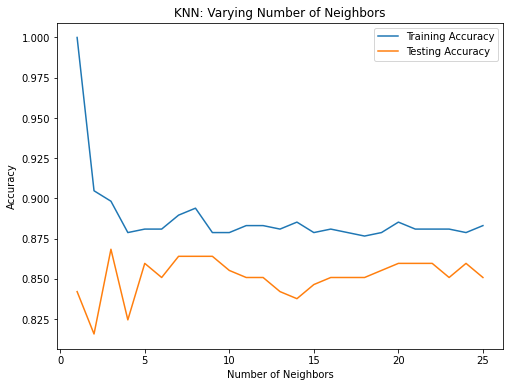

In [10]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier with default parameter values
knn = KNeighborsClassifier(n_neighbors=8)

# Fit knn to the train set
knn.fit(rescaledX_train, y_train)

# Import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Use knn to predict instances from the test set and store it
y_pred = knn.predict(rescaledX_test)


# Get the accuracy score of knn model and print it
print("Accuracy of KNeighborsClassifier for train data: ", knn.score(rescaledX_train, y_train))


# Print the confusion matrix of the knn model for test data
print("Accuracy of KNeighborsClassifier for test data: ", knn.score(rescaledX_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#-----------Ploting the train and test accuracy of KNN model----------------#

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
   knn = KNeighborsClassifier(n_neighbors=neighbor)
   knn.fit(rescaledX_train, y_train)
   train_accuracies[neighbor] = knn.score(rescaledX_train, y_train)
   test_accuracies[neighbor] = knn.score(rescaledX_test, y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

11.Evaluating classification models performance

[array([0.92207792, 0.8961039 , 0.8961039 , 0.81818182, 0.83116883,
       0.84415584]), array([0.90909091, 0.90909091, 0.92207792, 0.81818182, 0.81818182,
       0.85714286])]


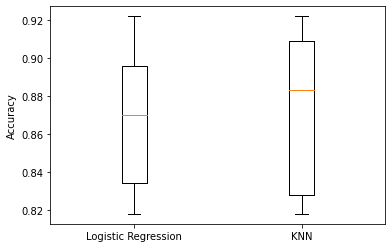

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(n_neighbors=8)}

results = []

for model in models.values():
 kf = KFold(n_splits=6, random_state=42, shuffle=True)
 cv_results = cross_val_score(model, rescaledX_train, y_train, cv=kf)
 results.append(cv_results)

print(results)
plt.boxplot(results, labels=models.keys())
plt.ylabel('Accuracy')
plt.show()

12. Hyper Tuning our models 

In this part we are going to use the GridSearchCV method to try to find the parameters that our our models performing 
better using them.

12.1 Hypertuning LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)
logreg = LogisticRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(logreg, param_grid=param_grid, cv=kf)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX_train, y_train)

y_pred = grid_model.predict(rescaledX_test)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best: 0.867965 using {'max_iter': 100, 'tol': 0.01}
[[99 26]
 [11 92]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       125
           1       0.78      0.89      0.83       103

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.85      0.84      0.84       228



12.1 Hypertuning KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()
k_range = list(range(1, 27))
param_grid = dict(n_neighbors=k_range)
kf = KFold(n_splits=6, shuffle=True, random_state=42) 

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search
grid_search=grid.fit(rescaledX_train, y_train)

# fitting the model for grid search
print(grid.best_params_, grid.best_score_)

# Evaluating on the test set
y_pred = grid.predict(rescaledX_test)

# Summarize results
best_score, best_params = grid.best_score_, grid.best_params_
print("Best: %f using %s" % (best_score, best_params))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 6 folds for each of 26 candidates, totalling 156 fits
{'n_neighbors': 22} 0.8852813852813853
Best: 0.885281 using {'n_neighbors': 22}
[[105  20]
 [ 12  91]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       125
           1       0.82      0.88      0.85       103

    accuracy                           0.86       228
   macro avg       0.86      0.86      0.86       228
weighted avg       0.86      0.86      0.86       228



13 Evaluating classification models performance after hyper tuning

[array([0.92207792, 0.8961039 , 0.8961039 , 0.81818182, 0.83116883,
       0.84415584]), array([0.93506494, 0.90909091, 0.93506494, 0.83116883, 0.83116883,
       0.87012987])]


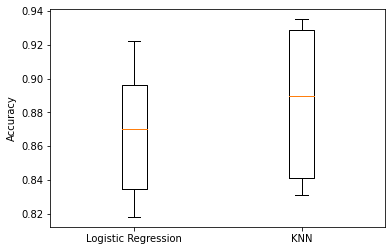

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {"Logistic Regression": LogisticRegression(max_iter=100, tol= 0.01), "KNN": KNeighborsClassifier(n_neighbors=22)}

results = []

for model in models.values():
 kf = KFold(n_splits=6, random_state=42, shuffle=True)
 cv_results = cross_val_score(model, rescaledX_train, y_train, cv=kf)
 results.append(cv_results)

print(results)
plt.boxplot(results, labels=models.keys())
plt.ylabel('Accuracy')
plt.show()

Result: 

The KNN model at n_neighbors = 8 was performaing better even after using grid search compared to
LogisticRegression before and after Hyper Tunning.

- I will choose the KNN model in setion 10 as my model

- I have saved my model in model.py file which contains the KNN model

Note: see technical report for more datails